# Preparation


In [7]:
!pip install -q kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 91% 204M/225M [00:01<00:00, 197MB/s]
100% 225M/225M [00:01<00:00, 201MB/s]


In [ ]:
!mkdir dataset
!unzip flowers-recognition.zip -d dataset

# Make Model

<h2><b>Import Library</b></h2>

In [8]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
from tensorflow.keras import layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h2><b>Initialize the path of dataset</b></h2>

In [9]:
dataset_bunga = '/content/dataset/flowers'
os.listdir(dataset_bunga)

['sunflower', 'rose', 'tulip', 'dandelion', 'daisy']

<h2><b>Making Model</b><h2>

<p>Steps :</p>
<ul>
  <li>Image Augmentation</li>
  <li>Image Generator</li>
  <li>Make NN Model</li>
  <li>Train Model</li>
  <li>Prediction</li>
</ul>

In [40]:
dataset_sunflower = '/content/dataset/flowers/sunflower'

'/content/dataset/flowers/sunflower'

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    dataset_bunga,
    seed = 123,
    batch_size = 32,
    target_size = (128, 128),
    subset='training',
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    dataset_bunga,
    seed = 123,
    batch_size = 32,
    target_size = (128, 128),
    subset='validation',
    class_mode = 'categorical'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


<h2><b>Making NN Architecture</b></h2>

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    # Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # Output Layer
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [31]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [32]:
num_epochs = 10

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=num_epochs
)

Epoch 1/10
109/109 [==============================] - 22s 202ms/step - loss: 1.2976 - accuracy: 0.4356 - val_loss: 1.1285 - val_accuracy: 0.5570
Epoch 2/10
109/109 [==============================] - 22s 206ms/step - loss: 1.0813 - accuracy: 0.5673 - val_loss: 1.0900 - val_accuracy: 0.5640
Epoch 3/10
109/109 [==============================] - 21s 194ms/step - loss: 0.9727 - accuracy: 0.6150 - val_loss: 0.9801 - val_accuracy: 0.6279
Epoch 4/10
109/109 [==============================] - 21s 190ms/step - loss: 0.9065 - accuracy: 0.6497 - val_loss: 1.0643 - val_accuracy: 0.5965
Epoch 5/10
109/109 [==============================] - 22s 206ms/step - loss: 0.9050 - accuracy: 0.6413 - val_loss: 0.9566 - val_accuracy: 0.6628
Epoch 6/10
109/109 [==============================] - 21s 194ms/step - loss: 0.7975 - accuracy: 0.6925 - val_loss: 0.9180 - val_accuracy: 0.6512
Epoch 7/10
109/109 [==============================] - 21s 190ms/step - loss: 0.7649 - accuracy: 0.7078 - val_loss: 0.8786 - val_ac

<h2><b>Plotting Accuracy</b></h2>



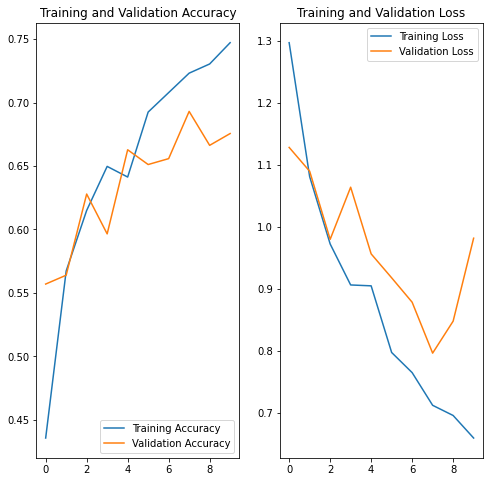

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#    **Predicting**

Saving tulip1.jpg to tulip1.jpg
tulip1.jpg
=== Tulip ===


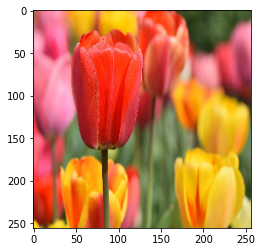

In [67]:
uploaded = files.upload()

for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size = (128, 128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  output_class = np.argmax(classes)

  print(fn)
  if output_class == 0:
    print('=== Daisy ===')
  elif output_class == 1:
    print('=== Dandelion ===')
  elif output_class == 2:
    print('=== Rose ===')
  elif output_class == 3:
    print('=== Sunflower ===')
  else:
    print('=== Tulip ===')